In [1]:
import numpy as np
import math
import ceo
%pylab inline
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def zernike(zi=1):
    print "j=%d"%zi
    npx = 512;
    u = np.linspace(-1,1,npx)
    x,y = np.meshgrid(u,u, indexing='xy')
    r = np.hypot(x,y)
    o = np.arctan2(y,x)
    nra = np.ceil((-3 + sqrt( 9 + 8*(zi-1) ))/2)
    print "n=%d"%nra
    n_mode = (nra+1)*(nra+2)/2.0
    #print n_mode
    a = np.zeros(n_mode)
    a[zi-1] = 1.0
    Z = ceo.ZernikeS(nra,a)
    cuo = ceo.cuDoubleArray(host_data=o)
    cur = ceo.cuDoubleArray(host_data=r)
    tid = ceo.StopWatch()
    tid.tic()
    S = Z.surface(cur,cuo)
    (dSdx,dSdy) = Z.surface_derivatives(cur,cuo)
    tid.toc()
    S_ = S.host()
    fig, (ax1,ax2,ax3) = subplots(ncols=3,sharey=True)
    fig.set_size_inches(20,4.5)
    h1 = ax1.imshow(S_,interpolation=None,origin='lower')
    colorbar(h1,ax=ax1)
    h2 = ax2.imshow(dSdx.host(),interpolation=None,origin='lower')
    colorbar(h2,ax=ax2)
    h3 = ax3.imshow(dSdy.host(),interpolation=None,origin='lower')
    colorbar(h3,ax=ax3)

j=29
n=7


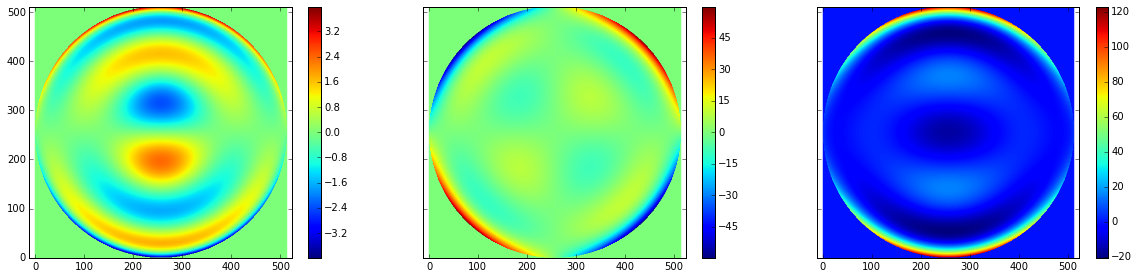

In [3]:
i = interact(zernike,zi=(1,45))

In [6]:
def zernike(zi=1,surf_id=0):
    print "j=%d"%zi
    npx = 512;
    u = np.linspace(-1,1,npx)
    x,y = np.meshgrid(u,u)
    r = np.hypot(x,y)
    o = np.arctan2(y,x)
    nra = np.ceil((-3 + sqrt( 9 + 8*(zi-1) ))/2)
    print "n=%d"%nra
    n_mode = (nra+1)*(nra+2)/2.0
    #print n_mode
    a = np.zeros((3,n_mode))
    a[:,zi-1] = 1.0
    print a
    Z = ceo.ZernikeS(nra,a,N_SURF=3)
    cuo = ceo.cuDoubleArray(host_data=o)
    cur = ceo.cuDoubleArray(host_data=r)
    tid = ceo.StopWatch()
    tid.tic()
    S = Z.surface(cur,cuo,surf_id)
    tid.toc()
    S_ = S.host()
    fig, ax1 = subplots(ncols=1,sharey=True)
    fig.set_size_inches(20,4.5)
    h1 = ax1.imshow(S_,interpolation=None)
    colorbar(h1,ax=ax1)

j=4
n=2
[[ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.]]


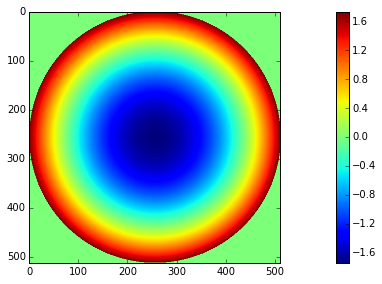

In [7]:
zernike(zi=4,surf_id=2)